In [350]:
# Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timedelta

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from scipy.stats import norm, skew 
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [351]:
#Read data set
X = pd.read_csv('train.csv')
test = pd.read_csv('test.csv' )

In [352]:
X.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [353]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [354]:
X.dropna(inplace = True)

In [355]:
test.dropna(inplace = True)

### Data overview

In [356]:
#Read first few rows of the data set
X.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Airline C,12/06/2019,Delhi,Cochin,DEL → MAA → COK,20:40,09:25 13 Jun,12h 45m,1 stop,No info,7480
1,Airline A,18/06/2019,Banglore,Delhi,BLR → DEL,18:55,22:00,3h 5m,non-stop,No info,8016
2,Airline C,18/05/2019,Delhi,Cochin,DEL → BOM → COK,03:50,19:15,15h 25m,1 stop,No info,8879
3,Airline A,6/05/2019,Kolkata,Banglore,CCU → BOM → BLR,20:00,08:15 07 May,12h 15m,1 stop,In-flight meal not included,9663
4,Airline A,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,06:30,12:00,5h 30m,1 stop,In-flight meal not included,9663


In [357]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Airline B,27-03-2019,Delhi,Cochin,DEL → HYD → COK,04:55,16:10,11h 15m,1 stop,No info
1,Airline E,27-05-2019,Kolkata,Banglore,CCU → BLR,22:20,28-05-2020 00:40,2h 20m,non-stop,No info
2,Airline C,06-06-2019,Kolkata,Banglore,CCU → IXR → DEL → BLR,05:50,20:25,14h 35m,2 stops,No info
3,Airline A,06-03-2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,No info
4,Airline B,15-06-2019,Delhi,Cochin,DEL → BOM → COK,16:00,16-06-2020 01:30,9h 30m,1 stop,No info


In [358]:
#Rows and columns of the data set
X.shape, test.shape

((8011, 11), (2671, 10))

### Data Summary

In [359]:
#Summary of numerical variables
X.describe()

,Price
count,8011.000000
mean,9062.235426
std,4626.848090
min,1759.000000
25%,5277.000000
50%,8371.000000
75%,12373.000000
max,79512.000000


In [360]:
#Summary of categorical variables
X.describe(include = ['object'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,8011,8011,8011,8011,8011,8011,8011,8011,8011,8011
unique,12,44,5,6,122,219,1182,353,4,10
top,Airline A,6/06/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,2881,390,3397,3397,1784,189,303,412,4235,6250


### Data pre-processing

### Missing Data

In [361]:
X.dropna(inplace=True)

In [362]:
X.isnull().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

### Features engineering (Part 1)

In [363]:
#Combining test set and tarining set to conduct features engineering
all_data = pd.concat([X,test],axis = 0)

#X = all_data.iloc[:10682]
#test = all_data.iloc[10682:]

### Total_Stops to numerical feature.

In [364]:
all_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [365]:
no_stops = {'1 stop':1,'non-stop':0,'2 stops':2,'3 stops':3,'4 stops':4}
all_data.Total_Stops = all_data.Total_Stops.map(no_stops)

In [366]:
all_data.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

#### Date time features

##### Date_of_Journey , Dep_Time and Arrival_Time contain date time value, we can separate them into more detail columns for further use.

In [367]:
all_data.Date_of_Journey.head()

0    12/06/2019
1    18/06/2019
2    18/05/2019
3     6/05/2019
4     9/05/2019
Name: Date_of_Journey, dtype: object

In [368]:
# convert into the date time format
all_data['Date_of_Journey'] = pd.to_datetime(all_data['Date_of_Journey'])

#### Date_of_Journey can be separate into month and day of week.

In [369]:
#Add journey month and day of week, then drop the original date of jounery column
all_data['Journey_month'] = all_data['Date_of_Journey'].dt.month
all_data['Journey_day_of_week'] = all_data.Date_of_Journey.dt.dayofweek
all_data['Journey_year'] = all_data.Date_of_Journey.dt.year
all_data['Journey_day'] = all_data.Date_of_Journey.dt.day
all_data.drop('Date_of_Journey',axis = 1,inplace = True)

In [370]:
all_data['Journey_year'].value_counts()

2019    10682
Name: Journey_year, dtype: int64

#### There are only one value in Journey_year, we can drop it.

In [371]:
all_data.drop('Journey_year',axis = 1,inplace = True)

##### Dep_Time and Arrival_Time need to convert into date time formate before processing it.

In [372]:
all_data[['Dep_Time', 'Arrival_Time']].head()

,Dep_Time,Arrival_Time
0,20:40,09:25 13 Jun
1,18:55,22:00
2,03:50,19:15
3,20:00,08:15 07 May
4,06:30,12:00


In [373]:
#add new 4 features in form of hour and mintues of departure time and arrival time.
all_data["Dep_hour"],all_data["Arr_hour"]= pd.to_datetime(all_data['Dep_Time']).dt.hour,pd.to_datetime(all_data['Arrival_Time']).dt.hour

all_data["Dep_min"],all_data["Arr_min"]= pd.to_datetime(all_data['Dep_Time']).dt.minute,pd.to_datetime(all_data['Arrival_Time']).dt.minute

In [374]:
#Drop the original depoarture time and arrival time columns
all_data.drop(['Arrival_Time'],axis =1 ,inplace =True)
all_data.drop(['Dep_Time'],axis =1,inplace =True)

In [375]:
all_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_month,Journey_day_of_week,Journey_day,Dep_hour,Arr_hour,Dep_min,Arr_min
0,Airline C,Delhi,Cochin,DEL → MAA → COK,12h 45m,1,No info,7480.0,12,4,6,20,9,40,25
1,Airline A,Banglore,Delhi,BLR → DEL,3h 5m,0,No info,8016.0,6,1,18,18,22,55,0
2,Airline C,Delhi,Cochin,DEL → BOM → COK,15h 25m,1,No info,8879.0,5,5,18,3,19,50,15
3,Airline A,Kolkata,Banglore,CCU → BOM → BLR,12h 15m,1,In-flight meal not included,9663.0,6,2,5,20,8,0,15
4,Airline A,Kolkata,Banglore,CCU → BOM → BLR,5h 30m,1,In-flight meal not included,9663.0,9,3,5,6,12,30,0


### Duration

In [376]:
all_data.Duration.head()

0    12h 45m
1      3h 5m
2    15h 25m
3    12h 15m
4     5h 30m
Name: Duration, dtype: object

##### Duration is in xh ym formate, some don't have information of mintues. I will separte duration into hour in mintue in the following section.

In [377]:
d = list(all_data.Duration)
duration_hour = []
duration_min = []

for time in d:
    if len(time.split()) == 2: #cell with both hour and mintues data
        hour = time.split()[0].rsplit('h')[0]
        mintues = time.split()[1].rsplit('m')[0]
        duration_hour.append(hour)
        duration_min.append(mintues)
    else: 
        #data with only hour or mintue information.
        if 'h' in time.split()[0]:
            hour =  time.split()[0].rsplit('h')[0]
            duration_hour.append(int(hour))
            duration_min.append(0) 
            # 0 mintues in there are no mintues data
        elif 'm'in time.split()[0]:
            mintues =  time.split()[0].rsplit('m')[0]
            duration_hour.append(0)
            duration_min.append(int(mintues))

In [378]:
#Check whether the length of the two lists we just created is same with the data set.
len(duration_hour) == len(duration_min ) == len(all_data)

True

In [379]:
all_data['duration_hour'] = pd.DataFrame(duration_hour).astype('int32')
all_data['duration_min'] = pd.DataFrame(duration_min).astype('int32')

In [380]:
all_data.drop(['Duration'],axis = 1, inplace = True)

##### Take a look of unique value and its count of these two new features.

In [381]:
all_data['duration_min'].value_counts()

30    1418
0     1060
20    1007
50     967
35     945
15     927
55     921
45     891
25     798
40     643
5      604
10     501
Name: duration_min, dtype: int64

In [382]:
all_data['duration_hour'].value_counts()

2     2413
1      615
3      505
7      490
5      486
9      458
8      425
12     401
13     393
11     376
10     347
6      336
14     330
15     275
23     263
4      237
16     237
26     235
22     224
21     199
24     186
27     182
25     180
20     156
17     145
18     139
19     126
28     110
29      60
30      51
38      34
37      16
35      11
32      10
33      10
34       5
36       5
0        2
40       2
42       2
39       2
31       2
47       1
Name: duration_hour, dtype: int64

In [383]:
all_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day_of_week,Journey_day,Dep_hour,Arr_hour,Dep_min,Arr_min,duration_hour,duration_min
0,Airline C,Delhi,Cochin,DEL → MAA → COK,1,No info,7480.0,12,4,6,20,9,40,25,12,45
1,Airline A,Banglore,Delhi,BLR → DEL,0,No info,8016.0,6,1,18,18,22,55,0,3,5
2,Airline C,Delhi,Cochin,DEL → BOM → COK,1,No info,8879.0,5,5,18,3,19,50,15,15,25
3,Airline A,Kolkata,Banglore,CCU → BOM → BLR,1,In-flight meal not included,9663.0,6,2,5,20,8,0,15,12,15
4,Airline A,Kolkata,Banglore,CCU → BOM → BLR,1,In-flight meal not included,9663.0,9,3,5,6,12,30,0,5,30


In [384]:
#Check again to ensure there are no missing data
all_data.isnull().any()

Airline                False
Source                 False
Destination            False
Route                  False
Total_Stops            False
Additional_Info        False
Price                   True
Journey_month          False
Journey_day_of_week    False
Journey_day            False
Dep_hour               False
Arr_hour               False
Dep_min                False
Arr_min                False
duration_hour          False
duration_min           False
dtype: bool

In [385]:
X = all_data.iloc[:8011]
test = all_data.iloc[8011:]

In [386]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day_of_week,Journey_day,Dep_hour,Arr_hour,Dep_min,Arr_min,duration_hour,duration_min
0,Airline C,Delhi,Cochin,DEL → MAA → COK,1,No info,7480.0,12,4,6,20,9,40,25,12,45
1,Airline A,Banglore,Delhi,BLR → DEL,0,No info,8016.0,6,1,18,18,22,55,0,3,5
2,Airline C,Delhi,Cochin,DEL → BOM → COK,1,No info,8879.0,5,5,18,3,19,50,15,15,25
3,Airline A,Kolkata,Banglore,CCU → BOM → BLR,1,In-flight meal not included,9663.0,6,2,5,20,8,0,15,12,15
4,Airline A,Kolkata,Banglore,CCU → BOM → BLR,1,In-flight meal not included,9663.0,9,3,5,6,12,30,0,5,30


In [387]:
test.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day_of_week,Journey_day,Dep_hour,Arr_hour,Dep_min,Arr_min,duration_hour,duration_min
0,Airline B,Delhi,Cochin,DEL → HYD → COK,1,No info,NaN,3,2,27,4,16,55,10,12,45
1,Airline E,Kolkata,Banglore,CCU → BLR,0,No info,NaN,5,0,27,22,0,20,40,3,5
2,Airline C,Kolkata,Banglore,CCU → IXR → DEL → BLR,2,No info,NaN,6,3,6,5,20,50,25,15,25
3,Airline A,Banglore,New Delhi,BLR → MAA → DEL,1,No info,NaN,6,0,3,9,14,45,25,12,15
4,Airline B,Delhi,Cochin,DEL → BOM → COK,1,No info,NaN,6,5,15,16,1,0,30,5,30


In [388]:
X.shape

(8011, 16)

In [389]:
test.shape

(2671, 16)

## Data Visualization


 mu = 9062.24 and sigma = 4626.56



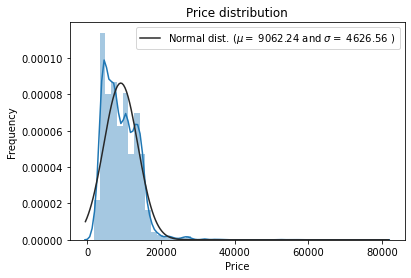

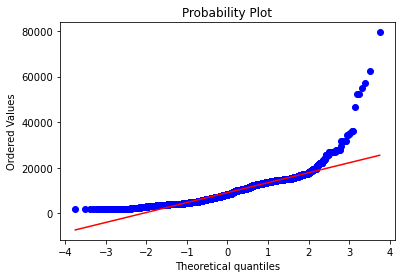

In [390]:
sns.distplot(X['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(X['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(X['Price'], plot=plt)
plt.show()

## Log-transformation of price


 mu = 8.99 and sigma = 0.51



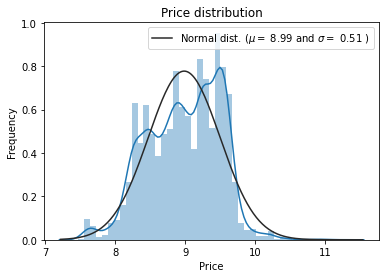

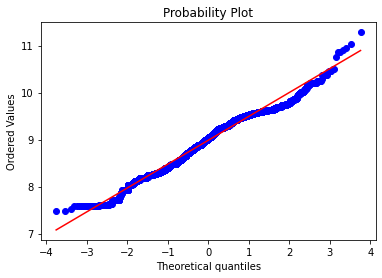

In [391]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
X["Price"] = np.log1p(X["Price"])

#Check the new distribution 
sns.distplot(X["Price"] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(X["Price"])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(X["Price"], plot=plt)
plt.show()

In [392]:
#list of categorical and numerical variables
cat_cols = X.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
num_cols = X.dtypes != 'object'
num_cols = list(num_cols[num_cols].index)
num_cols.remove('Price')

## Categorical variables

In [393]:
def cat_boxplot(col,target,train,a=8,b=6):
    f, ax = plt.subplots(figsize=(a, b))
    fig = sns.boxplot(x=col, y=str(target), data=train)
    #fig.axis(xmin=0, xmax=x);

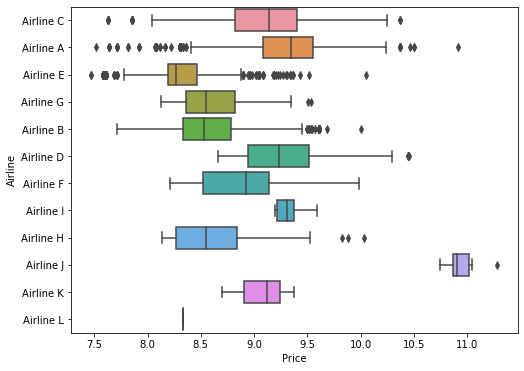

In [394]:
#Airline and log Price
cat_boxplot('Price',cat_cols[0],X,)

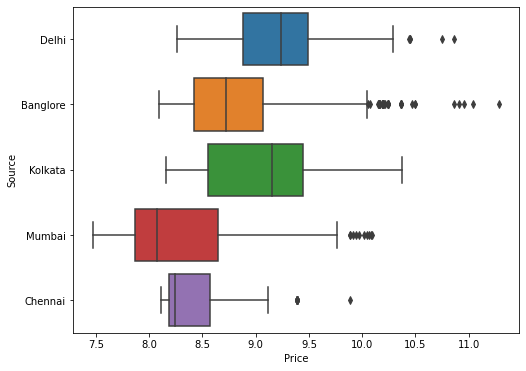

In [395]:
cat_boxplot('Price',cat_cols[1],X)

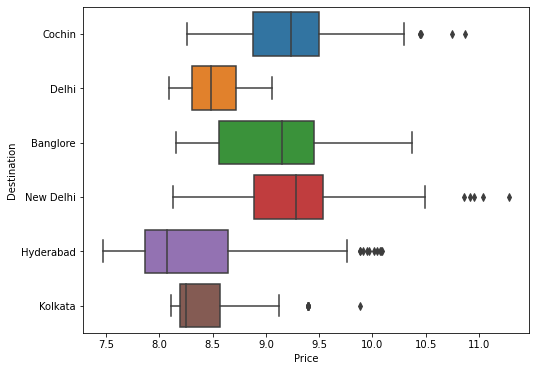

In [396]:
cat_boxplot('Price',cat_cols[2],X)

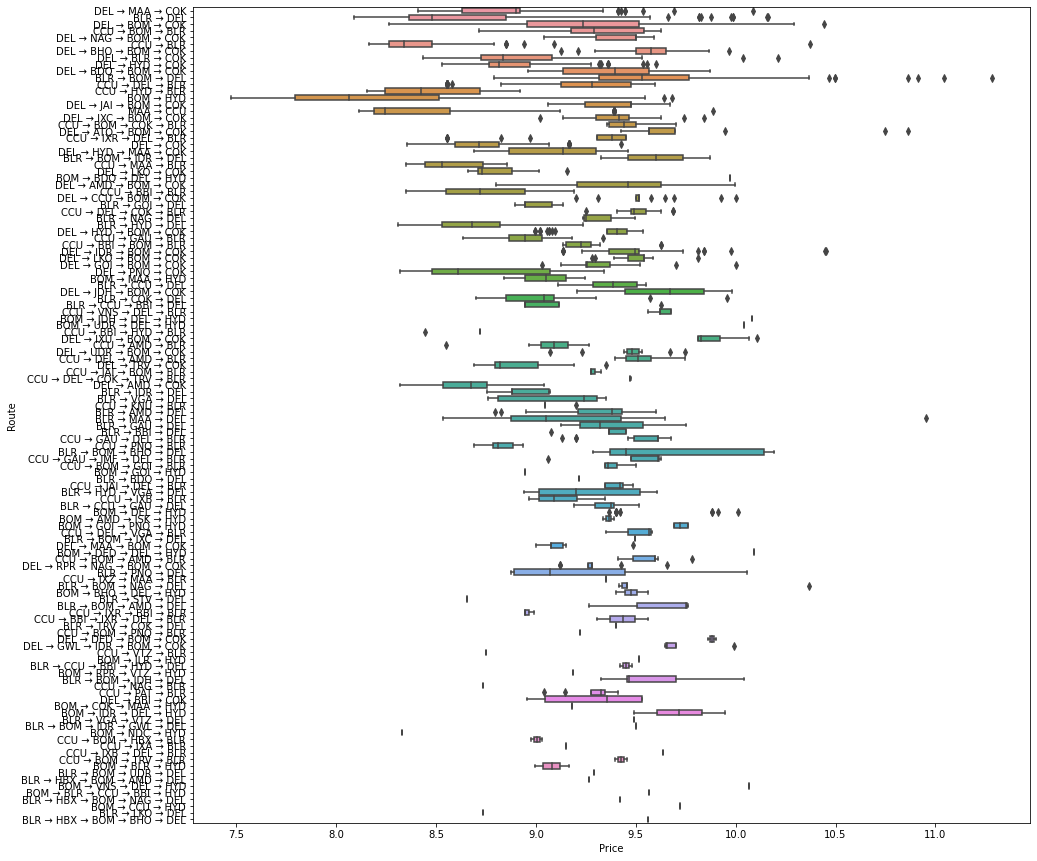

In [397]:
cat_boxplot('Price',cat_cols[3],X,a = 15,b= 15)

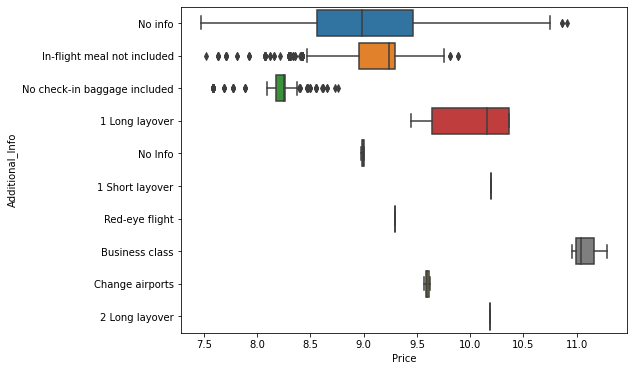

In [398]:
cat_boxplot('Price',cat_cols[4],X)

## Numerical Variables

In [399]:
def num_plot(col,target,train,a=8,b=6):
    f, ax = plt.subplots(figsize=(a, b))
    fig = sns.scatterplot(x=col, y=str(target), data=train)
    #fig.axis(ymin=0, ymax=x);

In [400]:
num_cols

['Total_Stops',
 'Journey_month',
 'Journey_day_of_week',
 'Journey_day',
 'Dep_hour',
 'Arr_hour',
 'Dep_min',
 'Arr_min',
 'duration_hour',
 'duration_min']

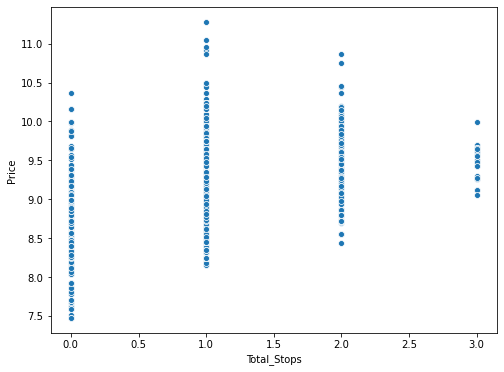

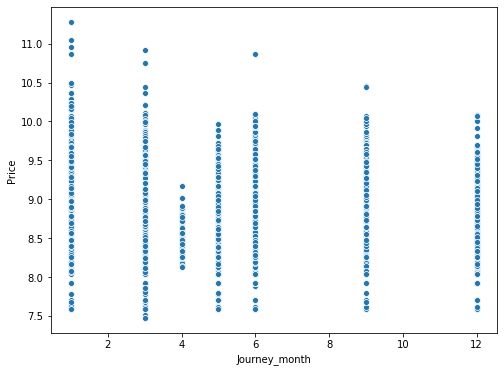

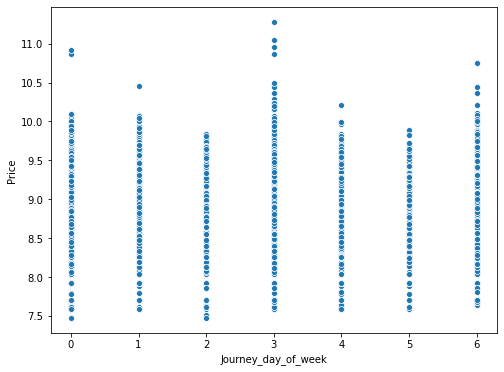

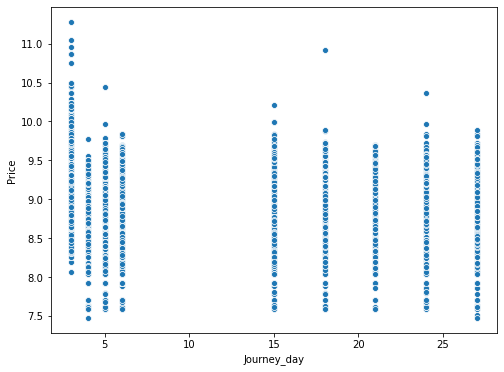

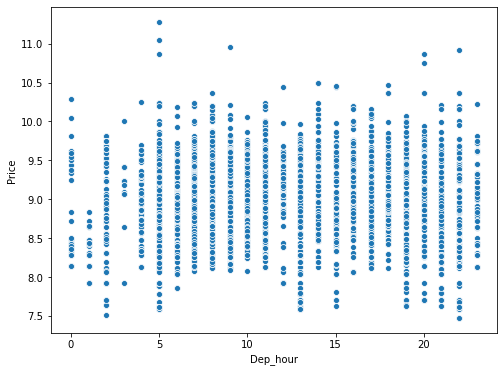

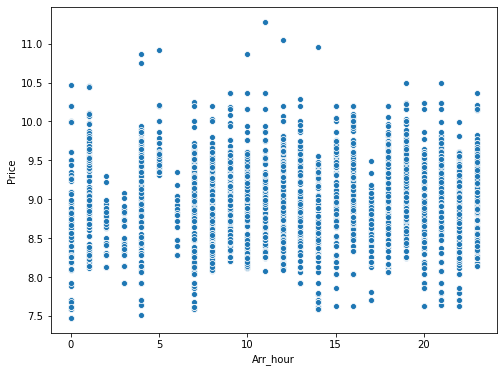

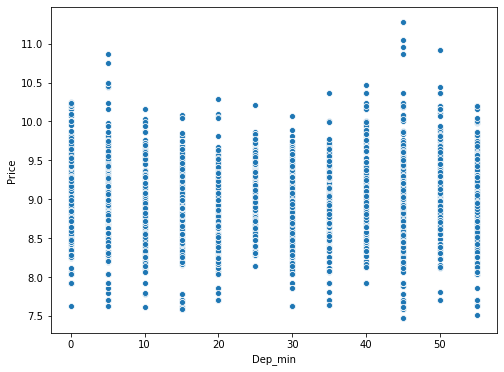

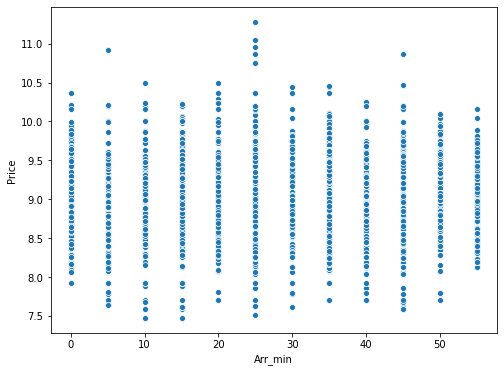

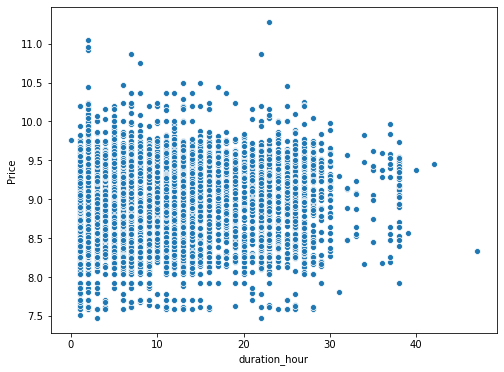

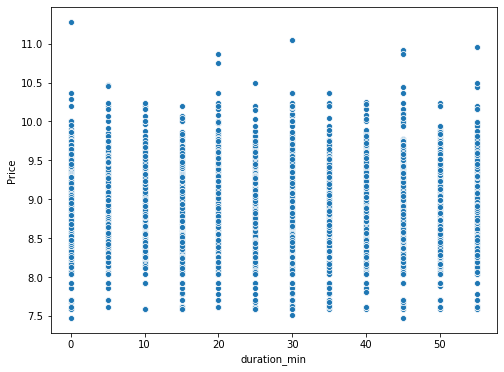

In [401]:
for i in range(len(num_cols)):
    num_plot(num_cols[i],'Price',X)

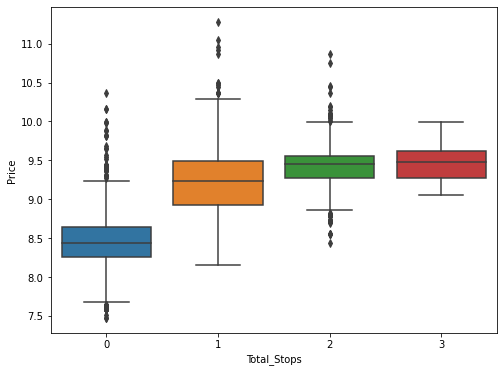

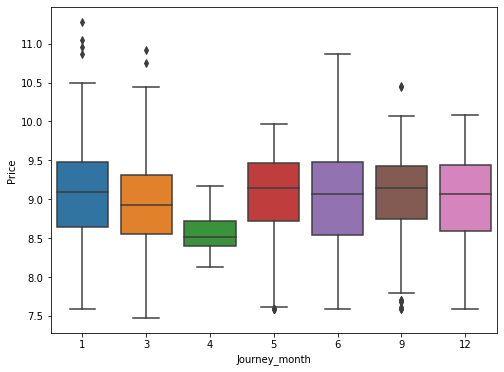

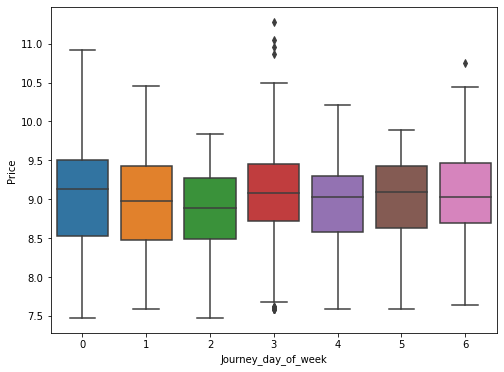

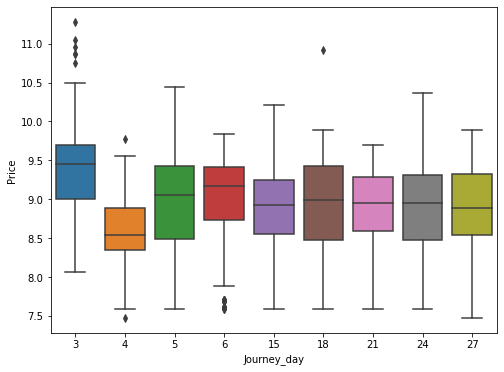

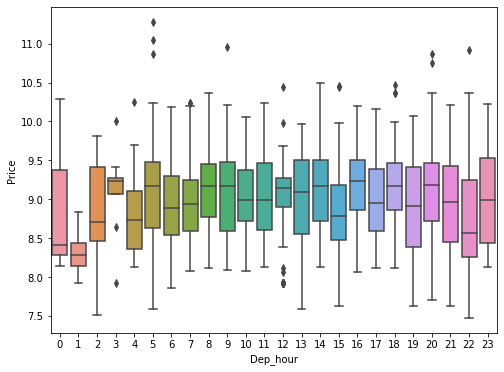

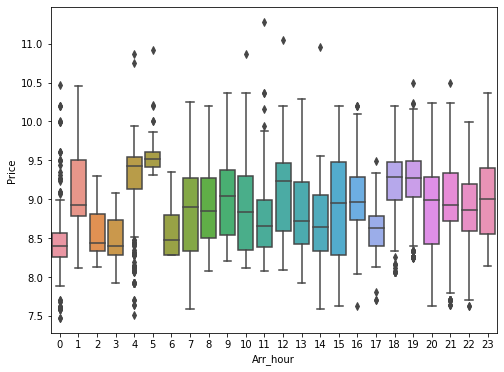

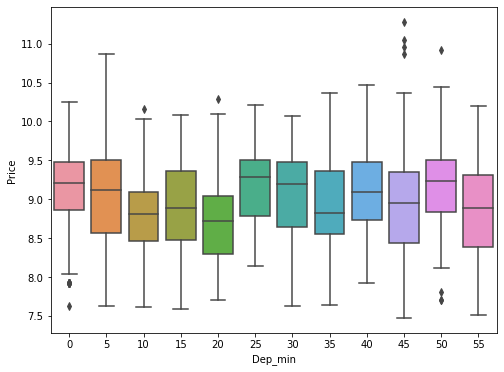

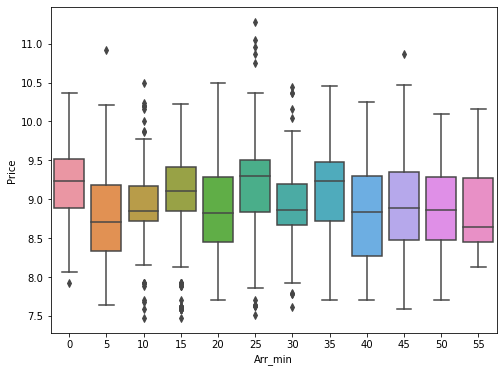

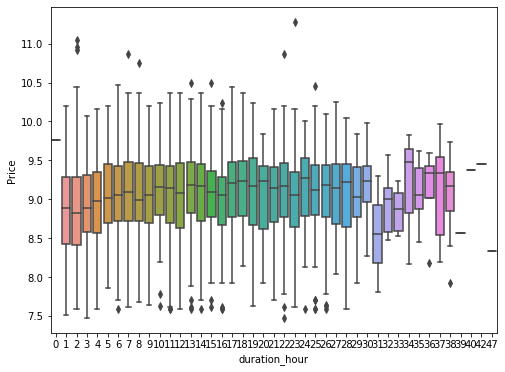

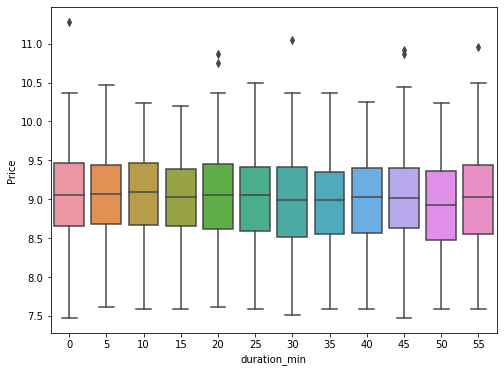

In [402]:
for i in range(len(num_cols)):
    cat_boxplot(num_cols[i],'Price',X)

##### Feature engineering (part 2)

## CatBoost Encoding

In [403]:
X.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_month,Journey_day_of_week,Journey_day,Dep_hour,Arr_hour,Dep_min,Arr_min,duration_hour,duration_min
0,Airline C,Delhi,Cochin,DEL → MAA → COK,1,No info,8.920122,12,4,6,20,9,40,25,12,45
1,Airline A,Banglore,Delhi,BLR → DEL,0,No info,8.989320,6,1,18,18,22,55,0,3,5
2,Airline C,Delhi,Cochin,DEL → BOM → COK,1,No info,9.091557,5,5,18,3,19,50,15,15,25
3,Airline A,Kolkata,Banglore,CCU → BOM → BLR,1,In-flight meal not included,9.176163,6,2,5,20,8,0,15,12,15
4,Airline A,Kolkata,Banglore,CCU → BOM → BLR,1,In-flight meal not included,9.176163,9,3,5,6,12,30,0,5,30


In [404]:
import category_encoders as ce

cat_features = ['Additional_Info','Route']
# Create the encoder
target_enc = ce.CatBoostEncoder(cols=cat_features)
target_enc.fit(X[cat_features], X['Price'])

# Transform the features, rename columns with _cb suffix, and join to dataframe
X_CBE = X.join(target_enc.transform(X[cat_features]).add_suffix('_cb'))
test_CBE = test.join(target_enc.transform(test[cat_features]).add_suffix('_cb'))

In [405]:
test_CBE['Route_cb'].value_counts()


9.240669    592
8.576573    380
9.320268    227
8.404312    187
8.156582    153
           ... 
9.210702      1
9.335966      1
8.718158      1
9.621912      1
9.349180      1
Name: Route_cb, Length: 85, dtype: int64

In [406]:
X = X_CBE.copy()
test = test_CBE.copy()
X.drop(['Route', "Additional_Info"], axis = 1, inplace = True)
test.drop(['Route', "Additional_Info"], axis = 1, inplace = True)

In [407]:
#Function to create a data frame with number and percentage of missing data in a data frame
def missing_to_df(df):
    #Number and percentage of missing data in training data set for each column
    total_missing_df = df.isnull().sum().sort_values(ascending =False)
    percent_missing_df = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
    missing_data_df = pd.concat([total_missing_df, percent_missing_df], axis=1, keys=['Total', 'Percent'])
    return missing_data_df
missing_df = missing_to_df(X)
missing_df[missing_df['Total'] > 0]

,Total,Percent


### Data Correlation

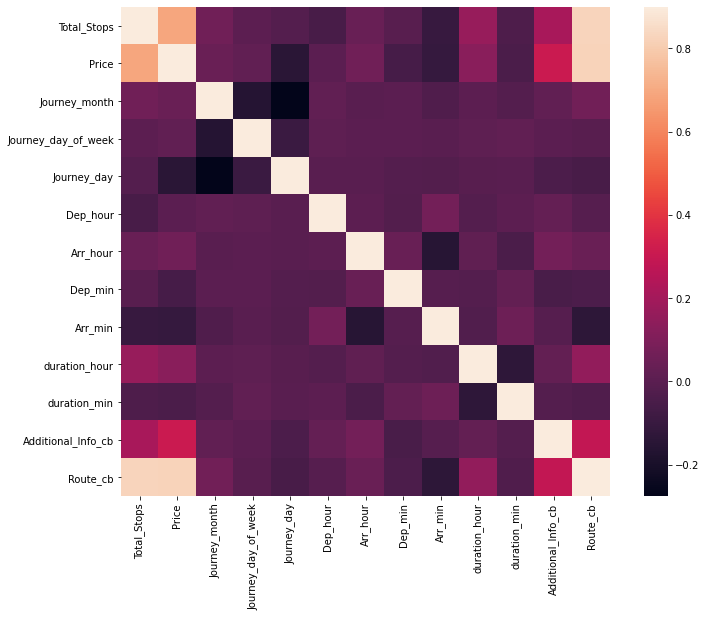

In [408]:
#Correlation map to see how features are correlated with Price
corrmat = X.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

#### One-Hot Encode the categorical columns.

In [409]:
all_data = pd.concat([X,test],axis = 0)
all_data = pd.get_dummies(all_data)
all_data.shape

(10682, 36)

In [410]:
X = all_data.iloc[:8011]
test = all_data.iloc[8011:]

In [411]:
test = test.drop('Price',axis = 1)

## Feature selection

In [412]:
def get_data_splits(dataframe, valid_fraction=0.1):
    valid_fraction = 0.1
    valid_size = int(len(dataframe) * valid_fraction)

    train = dataframe[:-valid_size * 2]
    # valid size == test size, last two sections of the data
    valid = dataframe[-valid_size * 2:-valid_size]
    test = dataframe[-valid_size:]
    
    return train, valid, test

In [413]:
from sklearn.feature_selection import SelectKBest, f_classif

sel_train, valid, _ = get_data_splits(X)
feature_cols = list(sel_train.columns)
feature_cols.remove('Price')
# Keep 10 features
selector = SelectKBest(f_classif, k=30)

X_new = selector.fit_transform(sel_train[feature_cols], sel_train['Price'])

In [414]:
# Get back the features we've kept, zero out all other features
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                 index=sel_train.index, 
                                 columns=feature_cols)

In [415]:
# Dropped columns have values of all 0s, so var is 0, drop them
selected_columns = selected_features.columns[selected_features.var() != 0]

# Get the valid dataset with the selected features.
selected_columns

Index(['Total_Stops', 'Journey_day', 'Arr_hour', 'Dep_min', 'Arr_min',
       'Additional_Info_cb', 'Route_cb', 'Airline_Airline A',
       'Airline_Airline B', 'Airline_Airline C', 'Airline_Airline D',
       'Airline_Airline E', 'Airline_Airline F', 'Airline_Airline G',
       'Airline_Airline H', 'Airline_Airline I', 'Airline_Airline J',
       'Airline_Airline K', 'Airline_Airline L', 'Source_Banglore',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

### Modelling

In [416]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import lightgbm as lgb

### Cross validation strategy

In [417]:
y = X.Price

In [418]:
X = X.drop('Price',axis = 1)

In [419]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, 
                                   y.values, 
                                   scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

### Base models

- LASSO Regression:

In [420]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

- Elastic Net Regression

In [421]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

- Kernel Ridge Regression

In [422]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

- Gradient Boosting Regression

In [423]:
GBoost = GradientBoostingRegressor(n_estimators=1500, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

- LightGBM

In [424]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

- Base models scores

In [425]:
lasso_score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(lasso_score.mean(), lasso_score.std()))


Lasso score: 0.2544 (0.0043)



In [426]:
enet_score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(enet_score.mean(), enet_score.std()))

ElasticNet score: 0.2544 (0.0043)



In [427]:
krr_score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(krr_score.mean(), krr_score.std()))

Kernel Ridge score: 0.2222 (0.0040)



In [428]:
gboost_score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(gboost_score.mean(), gboost_score.std()))

Gradient Boosting score: 0.1430 (0.0058)



In [429]:
lgb_score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(lgb_score.mean(), lgb_score.std()))

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11

In [430]:
models = pd.DataFrame({
    'Model': ['LASSO', 'ENet', 'KRR', 
              'GBoost', 'lgb'],#,'XGBoost'],
    'Mean_Score': [lasso_score.mean(), enet_score.mean(), krr_score.mean(), 
              gboost_score.mean(), lgb_score.mean()]})
#xgb_score.mean()
models.sort_values(by='Mean_Score', ascending=True)

,Model,Mean_Score
3,GBoost,0.142989
4,lgb,0.165478
2,KRR,0.222211
1,ENet,0.254385
0,LASSO,0.254438


### Models with features selection

In [431]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X[selected_columns].values)
    rmse= np.sqrt(-cross_val_score(model, X[selected_columns].values, 
                                   y.values, 
                                   scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [432]:
lasso_score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(lasso_score.mean(), lasso_score.std()))
enet_score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(enet_score.mean(), enet_score.std()))
krr_score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(krr_score.mean(), krr_score.std()))
gboost_score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(gboost_score.mean(), gboost_score.std()))
lgb_score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(lgb_score.mean(), lgb_score.std()))


Lasso score: 0.2549 (0.0044)

ElasticNet score: 0.2549 (0.0044)

Kernel Ridge score: 0.2349 (0.0043)

Gradient Boosting score: 0.1643 (0.0066)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in

In [433]:
models_sel = pd.DataFrame({
    'Model': ['LASSO', 'ENet', 'KRR', 
              'GBoost', 'lgb'], #'XGBoost',
    'Mean_Score': [lasso_score.mean(), enet_score.mean(), krr_score.mean(), 
              gboost_score.mean(), lgb_score.mean()]})  #xgb_score.mean(),
models_sel.sort_values(by='Mean_Score', ascending=True)

,Model,Mean_Score
3,GBoost,0.164341
4,lgb,0.182998
2,KRR,0.234918
1,ENet,0.254867
0,LASSO,0.254919


In [434]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

# MAE , MSE and RMSE

In [435]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
GBoost.fit(X_train, y_train)
y_pred = GBoost.predict(X_test)
print('MAE:', mean_absolute_error(np.expm1(y_test), np.expm1(y_pred)))
print('MSE:', mean_squared_error(np.expm1(y_test),np.expm1(y_pred)))
print('RMSE:', np.sqrt(mean_squared_error(np.expm1(y_test),np.expm1(y_pred))))

MAE: 885.86831181892
MSE: 2831803.942338454
RMSE: 1682.7964649173869


In [436]:
print('R square error:', r2_score(np.expm1(y_test),np.expm1(y_pred)))

R square error: 0.8662476890322068


In [437]:
GBoost = GradientBoostingRegressor(n_estimators=1500, learning_rate=0.05,
                                   max_depth=20, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [438]:
GBoost.fit(X,y)
gboost_pred = (GBoost.predict(X))
y_pred = np.expm1(GBoost.predict(test))


In [439]:
submission = pd.DataFrame({'Price':y_pred})
submission.head()

,Price
0,6156.652707
1,3604.901438
2,11260.331950
3,16300.685130
4,6632.957658


In [441]:

final_df=pd.DataFrame({ 'Price': y_pred})
final_df.to_csv('final_dataset_GBoost.csv',index=False)

## Random Forest Regressor

In [442]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [443]:
y_pred = reg_rf.predict(X_test)

In [444]:
reg_rf.score(X_train, y_train)

0.9923959694695466

In [445]:
reg_rf.score(X_test, y_test)

0.9374117319265389

In [449]:
y_pred = reg_rf.predict(test)
final_df=pd.DataFrame({ 'Price': y_pred})
final_df.to_csv('final_dataset_rf.csv',index=False)

## RandomizedSearchCV

In [451]:
from sklearn.model_selection import RandomizedSearchCV

In [452]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [453]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [454]:
rf_random = RandomizedSearchCV( estimator = reg_rf , param_distributions= random_grid , scoring='neg_mean_squared_error',
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [455]:
rf_random.fit(X_train , y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   6.5s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   9.9s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   3.5s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  8.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [457]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [458]:
prediction = rf_random.predict(X_test)

In [460]:
import sklearn.metrics as metrics
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 0.08016514050106496
MSE: 0.01873023704582463
RMSE: 0.1368584562452194


In [461]:
print("R2 Score of Our Model is : ")
print()
metrics.r2_score(y_test, prediction)

R2 Score of Our Model is : 



0.9308857227937233

In [462]:
train_pred = rf_random.predict(test)
final_df=pd.DataFrame({ 'Price': train_pred })
final_df.to_csv('randomizedsearchCV.csv',index=False)